In [1]:
from DynSystem import *

In [32]:
def gravity(y, t):
  m = 70
  G = 6.67 * 1e-11
  dy = [
    y[1],
    -2 * m * G / y[0]**2
  ]
  
  return np.array(dy)

In [70]:
def integrate_with_init_dist(init_dist: float):
  yin = np.array([init_dist, 0])
  dt = 20
  Tmax = 2e6
  N = int(Tmax / dt)
  for step in range(N):
    tstep = step * dt
    yout = odeRK4(gravity, yin, tstep, dt)
    yin = yout
    if yin[0] <= 0.3:
      vel = yin[1]
      time_last = tstep
      break
  time_last = tstep
  vel = yin[1]
  print(f'Tempo impiegato: {time_last/60/24:.2f} giorni\n' + f'Velocità = {vel*1e3:.3f} mm/s')
  return time_last, vel

In [73]:
init_pos = np.array([0.5, 1, 3, 5, 7, 9, 11])
times = []
vels = []
for pos in init_pos:
  time_last, vel = integrate_with_init_dist(pos)
  times.append(time_last)
  vels.append(vel)

Tempo impiegato: 2.10 giorni
Velocità = -0.158 mm/s
Tempo impiegato: 7.36 giorni
Velocità = -0.210 mm/s
Tempo impiegato: 40.89 giorni
Velocità = -0.237 mm/s
Tempo impiegato: 88.67 giorni
Velocità = -0.243 mm/s
Tempo impiegato: 147.26 giorni
Velocità = -0.246 mm/s
Tempo impiegato: 214.94 giorni
Velocità = -0.246 mm/s
Tempo impiegato: 290.64 giorni
Velocità = -0.247 mm/s


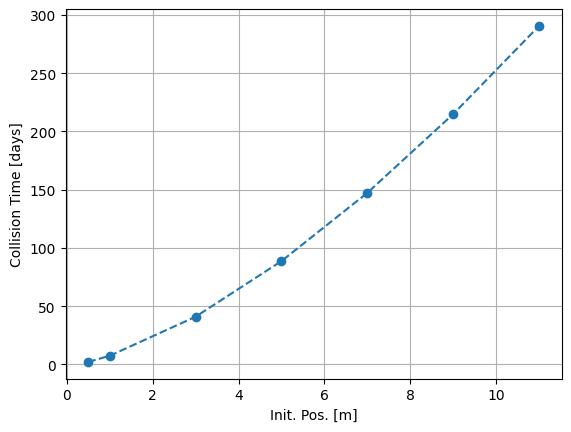

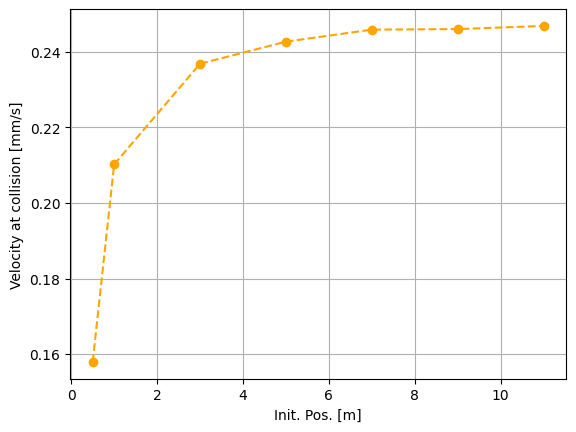

In [74]:
plt.plot(init_pos, np.array(times) / 60 /24, '--o')
plt.xlabel('Init. Pos. [m]')
plt.ylabel('Collision Time [days]')
plt.grid()
plt.show()

plt.plot(init_pos, -np.array(vels)*1e3, '--o', color='orange')
plt.xlabel('Init. Pos. [m]')
plt.ylabel('Velocity at collision [mm/s]')
plt.grid()
plt.show()